In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

# Define the list of company symbols in the Danish C25 index
c25_companies = [
    'CARL-B.CO', 'CHR.CO', 'COLO-B.CO', 'DANSKE.CO', 'DSV.CO',
    'MAERSK-B.CO', 'NDA-DK.CO', 'NOVO-B.CO', 'GN.CO',
    'ORSTED.CO', 'PNDORA.CO', 'RBREW.CO', 'TRYG.CO',
    'VWS.CO', 'DEMANT.CO', 'ROCK-B.CO', 'JYSK.CO', 
]

# Set the start and end dates for the data collection
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=5 * 365)).strftime('%Y-%m-%d')

# Create a directory to store the data
output_dir = 'c25_stock_data'
os.makedirs(output_dir, exist_ok=True)

# Collect stock data for each company
data_collection = {}

for symbol in c25_companies:
    print(f"Collecting data for {symbol}...")
    try:
        # Retrieve the stock data
        data = yf.download(symbol, start=start_date, end=end_date, interval='1mo')

        # Save the data to a CSV file
        filename = f"{output_dir}/{symbol}.csv"
        data.to_csv(filename)

        # Store the data for later use
        data_collection[symbol] = data

        print(f"Data collected for {symbol}")
    except Exception as e:
        print(f"Error collecting data for {symbol}: {e}")
print("Data collection and plotting complete.")


[*********************100%***********************]  1 of 1 completed
Data collected for CARL-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for CHR.CO
[*********************100%***********************]  1 of 1 completed
Data collected for COLO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DANSKE.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DSV.CO
[*********************100%***********************]  1 of 1 completed
Data collected for MAERSK-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for NDA-DK.CO
[*********************100%***********************]  1 of 1 completed
Data collected for NOVO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for GN.CO
[*********************100%***********************]  1 of 1 completed
Data collected for ORSTED.CO
[*********************100%**

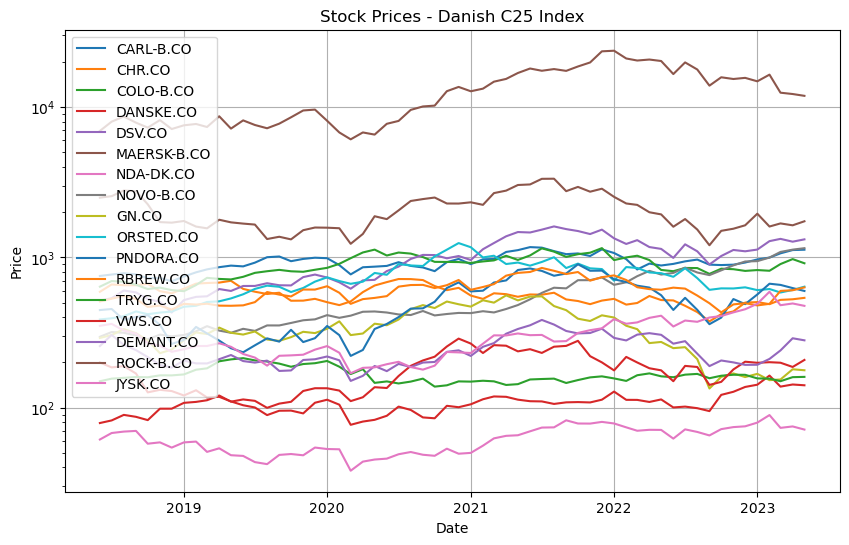

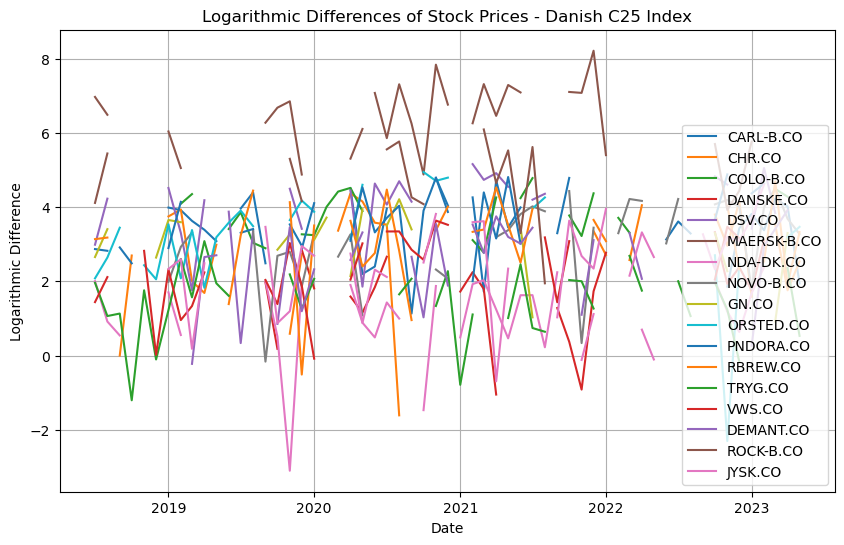

In [19]:
# Plot all stock prices on a logarithmic scale
plt.figure(figsize=(10, 6))
for symbol, data in data_collection.items():
    plt.plot(data['Close'], label=symbol)

plt.title("Stock Prices - Danish C25 Index")
plt.xlabel("Date")
plt.ylabel("Price")
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

# Plot logarithmic differences of stock prices
plt.figure(figsize=(10, 6))
for symbol, data in data_collection.items():
    price_diff = data['Close'].diff()  # Compute the differences between consecutive prices
    log_diff = np.log(1 + price_diff)  # Compute the logarithmic differences
    plt.plot(log_diff, label=symbol)

plt.title("Logarithmic Differences of Stock Prices - Danish C25 Index")
plt.xlabel("Date")
plt.ylabel("Logarithmic Difference")
plt.grid(True)
plt.legend()
plt.show()


